<a href="https://colab.research.google.com/github/cboomus/SAT5114/blob/main/SAT5114Lg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
# This project dataset by Ibraheem DL, Samy B, Therkorn JH, Falvo MJ.
# Beyond the Expiratory Limb: A Complete Raw Spirometry Dataset.
# Front Physiol. 2022 May 23;13:898831.
# doi: 10.3389/fphys.2022.898831. PMID: 35677095; PMCID: PMC9168312.

# The code was generated with shameless and extensive
# consultation with ChatGPT.

# The purpose is to determine if there is a statistically significant
# difference between races for spirometry-derived inhalation volumes
# and flow rates.

# Null hypothesis: There is no statistically significant
# difference between flow rates and volumes between races.


In [154]:
# This section is to convert the TXT file to a CSV file
# and drops the rows with NaN values

import pandas as pd

# Input and output file names
input_file_name = 'spirotidydata.txt'
output_file_name = 'spiro_data.csv'

# Define column labels
columns = ['ID', 'Visit', 'Trial', 'Time', 'Volume', 'Flow']

# Read data from txt file using pandas
df = pd.read_csv(input_file_name, names=columns, skiprows=1)

# Write data to csv file
df.to_csv(output_file_name, index=False)

# Drop rows that contain NaN
df = df.dropna()


In [155]:
# This section finds the max volume and flow for each
# ID, Visit, and Trial and saves in df spiro_data_max.csv

# Load the CSV file
df = pd.read_csv('spiro_data.csv')

# Convert 'Volume' and 'Flow' columns to numeric
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['Flow'] = pd.to_numeric(df['Flow'], errors='coerce')

# Group by ID, Visit, and Trial
grouped_df = df.groupby(['ID', 'Visit', 'Trial'])

# Find the maximum volume and flow for each group
max_volume = grouped_df['Volume'].max().reset_index()
max_flow = grouped_df['Flow'].max().reset_index()

# Merge the results on 'ID', 'Visit', and 'Trial'
max_values = pd.merge(max_volume, max_flow, on=['ID', 'Visit', 'Trial'])

# Rename columns to 'Max Volume' and 'Max Flow'
max_values = max_values.rename(columns={'Volume': 'Max Volume', 'Flow': 'Max Flow'})

# Save the result to a new CSV file in the same directory
max_values.to_csv('spiro_data_max.csv', index=False)



In [156]:
# This section merges the demographic file demographics_data.csv
# with the newly created file spiro_data_max.csv with the
# index value of ID and drops the rows with NaN values

# Load spiro_data_max.csv
max_values = pd.read_csv('spiro_data_max.csv')

# Load demographics_data.csv
demographics_data = pd.read_csv('demographics_data.csv')

# Merge the two DataFrames on the 'ID' column
merged_data = pd.merge(max_values, demographics_data, on='ID')

# Rename columns to lowercase
merged_data = merged_data.rename(columns={
    'WEIGHT': 'Weight',
    'HEIGHT': 'Height',
    'SEX': 'Sex',
    'AGE': 'Age',
    'ETHNICITY': 'Ethnicity',
    'RACE': 'Race'
})

# Drop rows with NaN values
merged_data = merged_data.dropna()

# Save the merged result to a new CSV file
merged_data.to_csv('merged_data.csv', index=False)


In [157]:
# This section processes the data to create binary data for
# the columns Sex, Ethnicity, and Race

# Load merged_data.csv
merged_data = pd.read_csv('merged_data.csv')

# Use get_dummies to one-hot encode 'Sex', 'Ethnicity', and 'Race'
merged_data_encoded = pd.get_dummies(merged_data, columns=['Sex', 'Ethnicity', 'Race'])

# Save the one-hot encoded result to a new CSV file
merged_data_encoded.to_csv('merged_data_encoded.csv', index=False)


In [158]:
# This section uses train_test_split to split the data into
# training and test data then uses Random Forest Regressor
# to predict max flow based on race

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load merged_data_encoded.csv
merged_data_encoded = pd.read_csv('merged_data_encoded.csv')

# 'Max Flow' is the target variable
target_variable = 'Max Flow'

# Extract features (X) and target variable (y)
X = merged_data_encoded.drop([target_variable], axis=1)
y = merged_data_encoded[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=37)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.5809841591529995
R-squared: -2.9156214405491467


In [159]:
# This section uses train_test_split to again split the data into
# training and test data then uses Random Forest Regressor
# to predict max volume based on race

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load merged_data_encoded.csv
merged_data_encoded = pd.read_csv('merged_data_encoded.csv')

# 'Max Flow' is the target variable
target_variable = 'Max Volume'

# Extract features (X) and target variable (y)
X = merged_data_encoded.drop([target_variable], axis=1)
y = merged_data_encoded[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=37)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print()


Mean Squared Error: 0.005432729749799881
R-squared: -1.7791366792467445



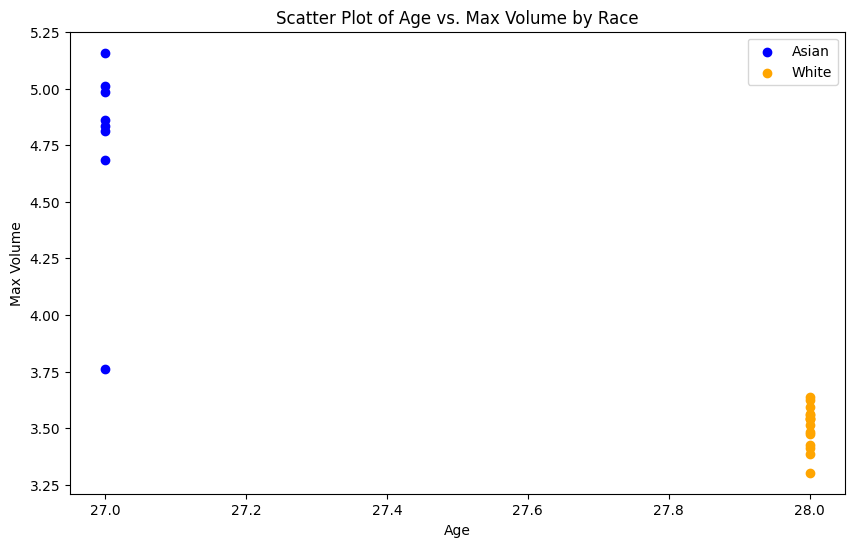

In [161]:
# Scatter plot of Max Volume to Age by Race
# To try to get more infomration about poor correlation

import matplotlib.pyplot as plt

# Read data into a DataFrame
merged_data = pd.read_csv('merged_data_encoded.csv')

# Extract relevant columns
age = merged_data['Age']
max_volume = merged_data['Max Volume']
race_asian = merged_data['Race_Asian']
race_white = merged_data['Race_White']

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot Asian data points
plt.scatter(age[race_asian == 1], max_volume[race_asian == 1], label='Asian', color='blue')

# Plot White data points
plt.scatter(age[race_white == 1], max_volume[race_white == 1], label='White', color='orange')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Max Volume')
plt.title('Scatter Plot of Age vs. Max Volume by Race')

# Add legend
plt.legend()

# Show the plot
plt.show()


T-statistic: 8.174246445381765
P-value: 6.053789995166166e-05


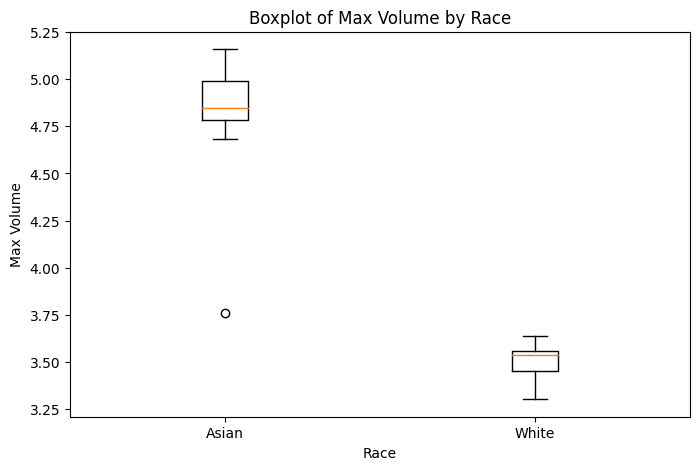

In [162]:
# This t-test is used to test the significant difference
# between these two people

from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Extract relevant columns
max_volume_asian = merged_data.loc[merged_data['Race_Asian'] == 1, 'Max Volume']
max_volume_white = merged_data.loc[merged_data['Race_White'] == 1, 'Max Volume']

# Perform t-test
t_statistic, p_value = ttest_ind(max_volume_asian, max_volume_white, equal_var=False)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Create a boxplot for better visualization
plt.figure(figsize=(8, 5))
plt.boxplot([max_volume_asian, max_volume_white], labels=['Asian', 'White'])
plt.xlabel('Race')
plt.ylabel('Max Volume')
plt.title('Boxplot of Max Volume by Race')
plt.show()
